In [5]:
import pandas as pd

data1 = pd.read_excel('En_In.xls', skiprows=range(1,18), skipfooter=38, usecols="C:F")

data1.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

data1.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


In [7]:
import numpy as np
data1 = pd.read_excel('En_In.xls', skiprows=range(1,18), skipfooter=38, usecols="C:F")
data1.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
data1['Energy Supply'] = data1['Energy Supply'].replace('.....', np.NaN)
data1['Energy Supply'] = data1['Energy Supply'] * 1000000

country_mapping = {
    r"(.*United States of America.*)": "United States",
    r"(.*United Kingdom of Great Britain and Northern Ireland.*)": "United Kingdom",
    r"(.*China, Hong Kong Special Administrative Region.*)": "Hong Kong",
    r"(^(?!.*Democratic People's).*Republic of Korea.*)": "South Korea"
}
data1['Country'] = data1['Country'].replace(country_mapping, regex=True)
renamed_countries = data1[data1['Country'].isin(country_mapping.values())]

import pandas as pd
import re

def clean_country_names(country):
    clean_name = re.sub(r' \(.+\)|\d+', '', country).strip()
    return clean_name

data1['Country'] = data1['Country'].apply(clean_country_names)

In [8]:
data1.loc[data1['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,.................................................,...,0.641026
24,Bolivia,336000000,32,31.477120
164,South Korea,11007000000,221,2.279353


In [9]:
import pandas as pd
data2 = pd.read_csv('gpd.csv', skiprows=4)
country_mapping = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
data2['Country Name'] = data2['Country Name'].replace(country_mapping)

In [10]:
data2.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10


In [12]:
import pandas as pd

file_path = 'scimagojr.xlsx'
data3 = pd.read_excel(file_path)

data3.head(1)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.7,138


In [13]:
top15 = data3.head(15)

gdp = data2[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
gdp.set_index('Country Name', inplace=True)

energy = data1[['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']]
energy.set_index('Country', inplace=True)

merged = top15.merge(gdp, how='inner', left_on='Country', right_index=True).merge(energy, how='inner', left_on='Country', right_index=True)

merged.reset_index(inplace=True)

merged = merged[['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable',
                 '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
merged.head(1)

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,China,1,127050,126767,597237,411683,4.7,138,127191000000,93,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12


In [14]:
def average_gdp(df):
    gdp_columns = [str(year) for year in range(2006, 2016)]
    
    df['Average GDP'] = df[gdp_columns].mean(axis=1)
    
    avg_gdp_series = df.set_index('Country')['Average GDP']
    
    avg_gdp_series = avg_gdp_series.sort_values(ascending=False)
    
    return avg_gdp_series

average_gdp_result = average_gdp(merged)

print(average_gdp_result)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: Average GDP, dtype: float64


In [24]:
def gdp_change_for_5th_country(df):
    gdp_columns = [str(year) for year in range(2006, 2016)]
    df['Average GDP'] = df[gdp_columns].mean(axis=1)
    
    sorted_df = df.sort_values(by='Average GDP', ascending=False)
    
    fifth_country = sorted_df.iloc[4]
    
    country_name = fifth_country['Country']
    
    gdp_change = fifth_country['2015'] - fifth_country['2006']
    
    return (country_name, gdp_change)

gdp_change_result = gdp_change_for_5th_country(merged)

print(gdp_change_result)

def max_renewable_country(df):
    max_value = df['% Renewable'].max()
    
    country_name = df[df['% Renewable'] == max_value]['Country'].values[0]
    
    return (country_name, max_value)

max_renewable_result = max_renewable_country(merged)

print(max_renewable_result)

def calculate_population_and_find_6th(df):
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    sorted_population = df.sort_values(by='Population', ascending=False)
    
    sixth_country = sorted_population.iloc[5] 
    
    return (sixth_country['Country'], sixth_country['Population'])

result = calculate_population_and_find_6th(merged)

print(result)

def calculate_correlation(df):
    if 'Population' not in df.columns:
        df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    df['Citations per Capita'] = df['Citations'] / df['Population']
    
    df['Citations per Capita'] = pd.to_numeric(df['Citations per Capita'], errors='coerce')
    df['Energy Supply per Capita'] = pd.to_numeric(df['Energy Supply per Capita'], errors='coerce')
    
    df = df.dropna(subset=['Citations per Capita', 'Energy Supply per Capita'])
    
    correlation = df['Citations per Capita'].corr(df['Energy Supply per Capita'])
    
    return correlation

correlation_result = calculate_correlation(merged)

print(correlation_result)

('France', 153345695364.24023)
('Brazil', 69.64803)
('Japan', 127409395.97315437)
0.6668248468590926


In [19]:
import pandas as pd

renewable_median = merged['% Renewable'].median()

merged['Above Median Renewable'] = (merged['% Renewable'] >= renewable_median).astype(int)

result = merged.sort_values('Rank').set_index('Country')['Above Median Renewable']

result

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Above Median Renewable, dtype: int32

In [20]:
import pandas as pd

ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

merged['Continent'] = merged['Country'].map(ContinentDict)

merged['Estimated Population'] = merged['Energy Supply'] / merged['Energy Supply per Capita']

continent_stats = merged.groupby('Continent')['Estimated Population'].agg(['size', 'sum', 'mean', 'std'])

continent_stats.index.name = 'Continent'

continent_stats

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


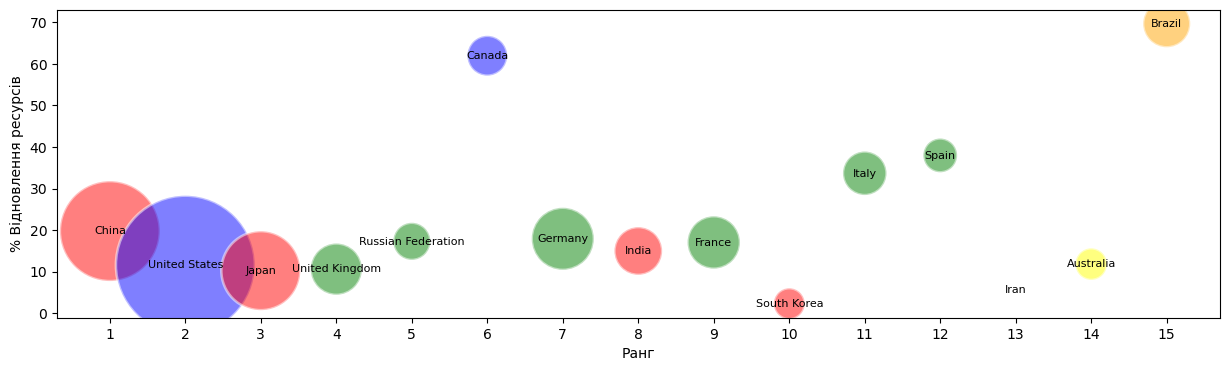

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))  

country_colors = {
    'China': 'red', 
    'Japan': 'red',  
    'India': 'red', 
    'South Korea': 'red',  
    'Iran': 'red',  
    'United States': 'blue', 
    'Canada': 'blue',  
    'United Kingdom': 'green', 
    'Russian Federation': 'green',  
    'Germany': 'green', 
    'France': 'green', 
    'Italy': 'green', 
    'Spain': 'green',  
    'Brazil': 'orange',  
    'Australia': 'yellow' 
}

bubble = sns.scatterplot(x='Rank', y='% Renewable', size='2015', data=merged, sizes=(500, 10000), legend=False, hue=merged['Country'], palette=country_colors, alpha=0.5)
plt.legend([], [], frameon=False)  

plt.xlabel('Ранг')  
plt.ylabel('% Відновлення ресурсів') 
plt.xticks(range(1, 16, 1))
plt.yticks(fontsize=10) 

for i in range(len(merged)):
    plt.text(merged['Rank'][i], merged['% Renewable'][i], merged['Country'][i], ha='center', va='center', fontsize=8)

plt.show()